QB_Logo.svg



---
Fundamentals of Quantitative Biology

# **Statistics 05**
---


These notebooks are designed to be worked through step by step. We encourage you to go through all of it.  

# Table of Contents

This notebook contains the content of the 4th Statistics Lecture, which includes:

1. **Feature Reduction**
2. **tSNE**
3. **UMAP**

---

## **Feature Reduction Techniques**

We will work with the gene expression dataset that you are already familiar with from the previous notebook.

As you may recall, the dataset contains expression levels for 1857 genes across 2009 cells. This means the data spans a high-dimensional space, where each gene represents a dimension, and the cells are points within this space. On average, there is just over one gene per dimension, making the space extremely sparse.

Such high-dimensional data can pose challenges for analysis, as many of the genes may contribute little to the biological signal of interest or may even act as noise, obscuring meaningful patterns. To address this, we will explore techniques to reduce the dimensionality of the dataset by filtering out uninformative genes. This will help us focus on the most relevant features, uncovering the underlying biological structure more effectively.

### Variance Thresholding

Features (e.g., genes in a gene expression dataset) with low variance are often uninformative because they do not change much between samples (e.g. cells) and are unlikely to contribute meaningfully to downstream analyses like clustering or classification.


1. **Variance Calculation**:
   - For each feature (e.g., gene), calculate its variance across all samples (e.g., cells).
   - Variance measures how much the values of a feature deviate from its mean.

2. **Thresholding**:
   - Remove features whose variance is below a specified threshold.
   - The threshold is a user-defined value that determines how much variability is required for a feature to be retained.


- **Trade-offs**:
  - Removing too many features may reduce the biological relevance of the dataset.
  - Retaining too many features may increase computational complexity and include irrelevant features.

---


In [ ]:
##### LOAD cell-gene dataset ####
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np

# For google Colabs do
# drive.mount('/content/drive')

path = 'data/'
counts = pd.read_csv(path + 'adata_lognormed_final.csv', index_col=0)

print(type(counts))
print(counts.head())

print('Rows (cells): %d, Columns (genes): %d' % counts.shape)
###############################

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
                  TNFRSF4  CPSF3L  ATAD3C  C1orf86      RER1  TNFRSF25  \
AAACATACAACCAC-1      0.0     0.0     0.0      0.0  0.000000  4.552789   
AAACATTGAGCTAC-1      0.0     0.0     0.0      0.0  3.038826  0.000000   
AAACATTGATCAGC-1      0.0     0.0     0.0      0.0  3.545876  0.000000   
AAACCGTGCTTCCG-1      0.0     0.0     0.0      0.0  3.277530  0.000000   
AAACGCACTGGTAC-1      0.0     0.0     0.0      0.0  0.000000  0.000000   

                  TNFRSF9  CTNNBIP1  SRM  UBIAD1  ...     BRWD1  BACE2  SIK1  \
AAACATACAACCAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACATTGAGCTAC-1      0.0       0.0  0.0     0.0  ...  3.038826    0.0   0.0   
AAACATTGATCAGC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACCGTGCTTCCG-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACGCACTGGTAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   

          

In [2]:
# LOAD the necessary modules

from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

Shape of the original dataset: (2009, 1857)
Variance of the first few genes:
TNFRSF4    0.977378
CPSF3L     1.049159
ATAD3C     0.051878
C1orf86    2.161034
RER1       2.546683
dtype: float64


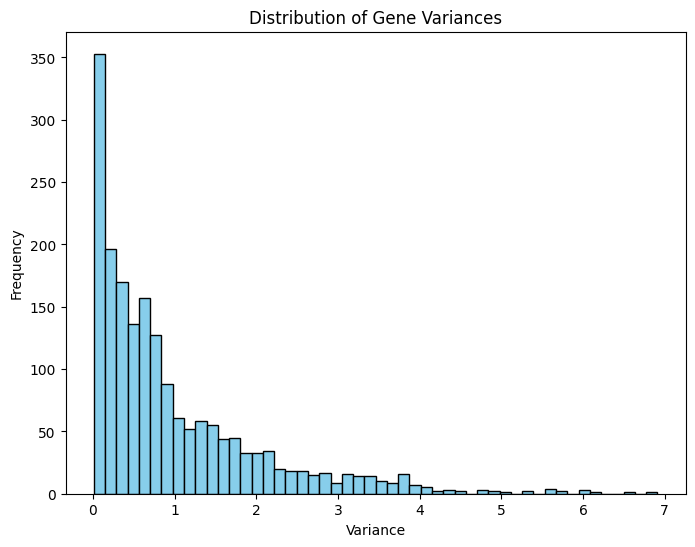

In [7]:

# Calculate variance for each feature / gene
gene_variances = counts.var(axis=0)

# Display the first few variances
print("Variance of the first few genes:")
print(gene_variances.head())

# Plot the distribution of variances
plt.figure(figsize=(8, 6))
plt.hist(gene_variances, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Gene Variances")
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Define a variance threshold
threshold = 1.  # Adjust this value as needed

# Apply variance thresholding
selector = VarianceThreshold(threshold=threshold)
counts_reduced = selector.fit_transform(counts)

# Get the names of the selected genes
selected_genes = counts.columns[selector.get_support()]

# Display the results
print(f"Number of genes before filtering: {counts.shape[1]}")
print(f"Number of genes after filtering: {counts_reduced.shape[1]}")
print("Selected genes:", selected_genes.tolist())

Number of genes before filtering: 1857
Number of genes after filtering: 620
Selected genes: ['CPSF3L', 'C1orf86', 'RER1', 'SRM', 'TNFRSF1B', 'SDHB', 'CAPZB', 'CDA', 'PITHD1', 'TMEM50A', 'LDLRAP1', 'STMN1', 'TAF12', 'YTHDF2', 'HDAC1', 'MARCKSL1', 'SMIM12', 'TRAPPC3', 'PPIE', 'CAP1', 'PPT1', 'SMAP2', 'EBNA1BP2', 'PRDX1', 'SCP2', 'ACADM', 'IFI44', 'SH3GLB1', 'GTF2B', 'GBP1', 'TMED5', 'SARS', 'LAMTOR5', 'DRAM2', 'DENND2D', 'C1orf162', 'CD2', 'CTSS', 'S100A11', 'S100A8', 'S100A6', 'SNAPIN', 'JTB', 'PMF1', 'CD48', 'PFDN2', 'FCER1G', 'FCGR2A', 'FCGR3A', 'TMCO1', 'CD247', 'MPC2', 'SELL', 'NCF2', 'RGS1', 'TIMM17A', 'PTPN7', 'G0S2', 'TRAF3IP3', 'CNIH4', 'LBR', 'SRP9', 'PARP1', 'RNF187', 'ACP1', 'TMEM18', 'ID2', 'ODC1', 'RDH14', 'ITSN2', 'SNX17', 'DPY30', 'CDC42EP3', 'CCT4', 'ACTR2', 'NFU1', 'MPHOSPH10', 'CCT7', 'MRPL19', 'TRABD2A', 'TGOLN2', 'VAMP8', 'VAMP5', 'RNF181', 'GNLY', 'MAL', 'ZAP70', 'EIF5B', 'IL1B', 'CCDC115', 'UBXN4', 'MMADHC', 'PSMD14', 'GCA', 'PPIG', 'OLA1', 'ZC3H15', 'SF3B1', 'NOP5

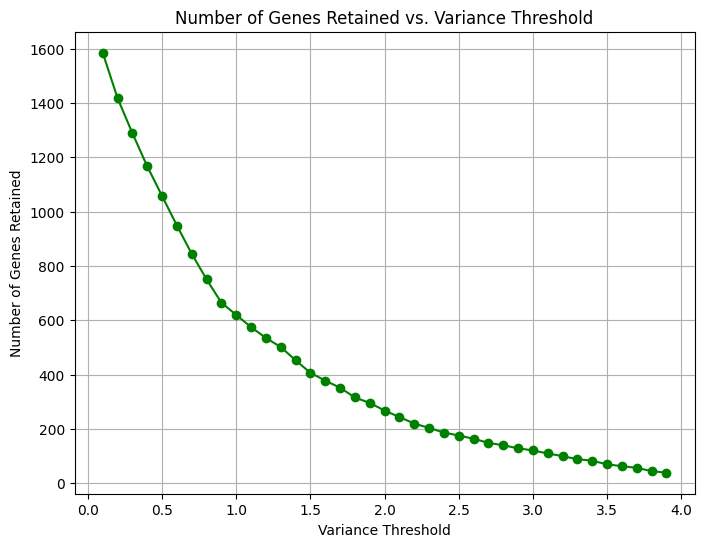

In [13]:
# Test different thresholds
thresholds = np.arange(.1,4.,.1)
num_genes_retained = []

for t in thresholds:
    selector = VarianceThreshold(threshold=t)
    counts_reduced = selector.fit_transform(counts)
    num_genes_retained.append(counts_reduced.shape[1])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_genes_retained, marker='o', color='green')
plt.title("Number of Genes Retained vs. Variance Threshold")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Genes Retained")
plt.grid()
plt.show()

Optimal threshold (elbow point): 0.9


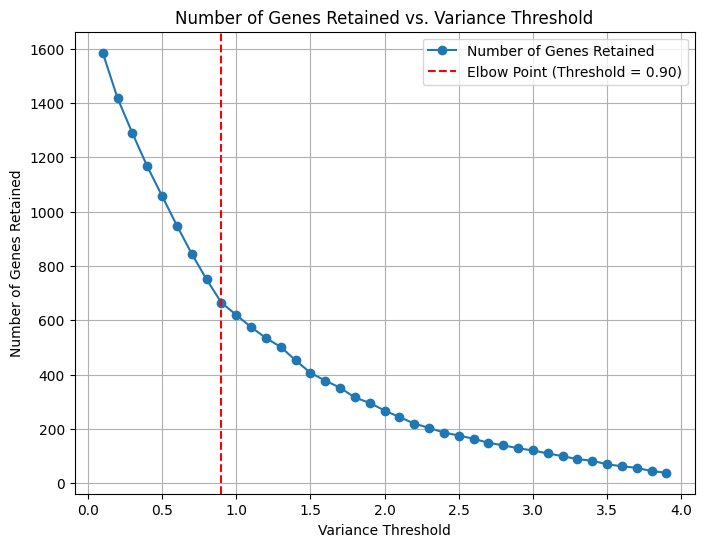

In [14]:
# There are multiple ways to quantify the optimal threshold from this curve above.
# One simple method is via the curvature of the curve:

# First derivative (rate of change)
first_derivative = np.gradient(num_genes_retained, thresholds)

# Second derivative (curvature)
second_derivative = np.gradient(first_derivative, thresholds)

# Find the index of the maximum curvature
elbow_index = np.argmax(np.abs(second_derivative))
optimal_threshold = thresholds[elbow_index]

print(f"Optimal threshold (elbow point): {optimal_threshold}")

# Plot the curve with the elbow point
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_genes_retained, marker='o', label="Number of Genes Retained")
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Elbow Point (Threshold = {optimal_threshold:.2f})")
plt.title("Number of Genes Retained vs. Variance Threshold")
plt.xlabel("Variance Threshold")
plt.ylabel("Number of Genes Retained")
plt.legend()
plt.grid()
plt.show()

### **Correlation Filtering**

Correlation filtering is a feature selection technique that removes features (e.g., genes) that are highly correlated with one another. Highly correlated features often carry redundant information and can lead to overfitting or increased computational complexity in downstream analyses.


1. **Compute Correlation Matrix**:
   - Calculate the pairwise correlation between all features in the dataset.

2. **Set a Correlation Threshold**:
   - Define a threshold (e.g., 0.9) above which features are considered highly correlated.

3. **Remove Redundant Features**:
   - For each pair of features with a correlation above the threshold, remove one of the features (e.g., the one with lower variance).


- **Domain Knowledge**:
  - Use biological or domain-specific knowledge to decide which features to retain when correlations are high.

---



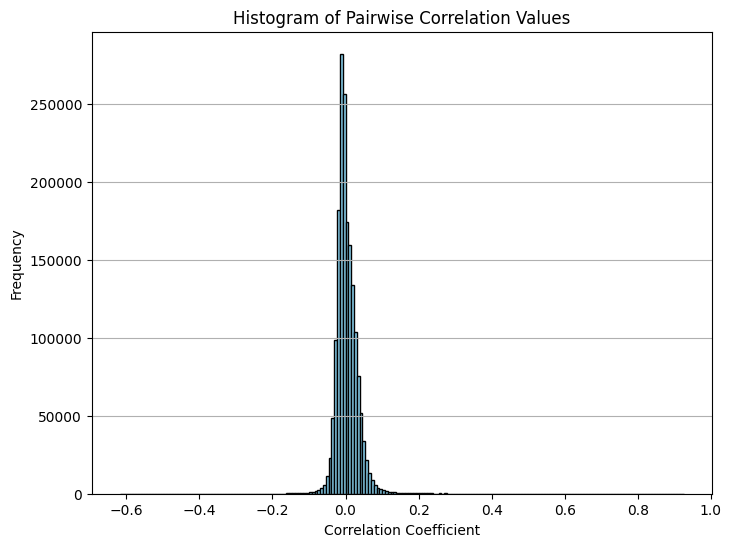

In [18]:
# Compute the correlation matrix
correlation_matrix = counts.corr()

# Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Flatten the upper triangle and remove NaN values
correlation_values = upper_triangle.unstack().dropna()

# Plot the histogram of correlation values
plt.figure(figsize=(8, 6))
plt.hist(correlation_values, bins=200, color='skyblue', edgecolor='black')
plt.title("Histogram of Pairwise Correlation Values")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


In [19]:


# Identify highly correlated features (considering absolute values)
threshold = 0.2  # Set the correlation threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with absolute correlation above the threshold
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print(f"Number of features to drop: {len(to_drop)}")

# Drop the highly correlated features
counts_filtered = counts.drop(columns=to_drop)

print("Shape of the dataset after filtering:", counts_filtered.shape)

Number of features to drop: 344
Shape of the dataset after filtering: (2009, 1513)


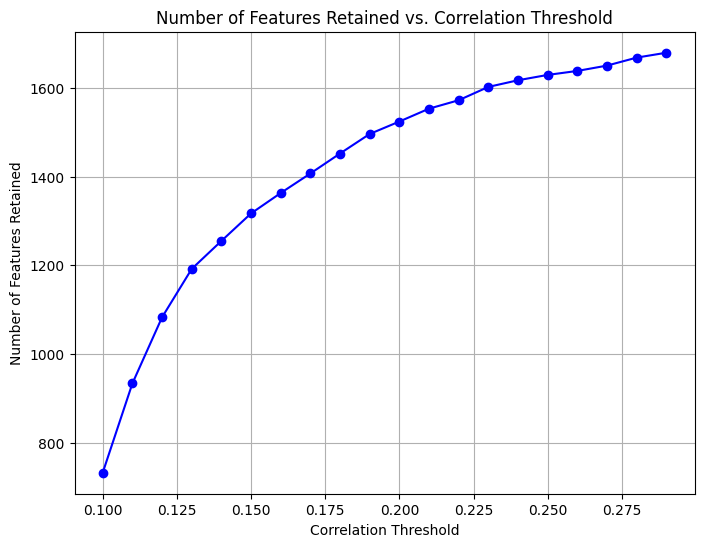

In [21]:
# Test different thresholds
thresholds = np.arange(.1,.3,.01)#[0.7, 0.8, 0.9, 0.95]
num_features_retained = []

for t in thresholds:
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > t)]
    counts_filtered = counts.drop(columns=to_drop)
    num_features_retained.append(counts_filtered.shape[1])

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, num_features_retained, marker='o', color='blue')
plt.title("Number of Features Retained vs. Correlation Threshold")
plt.xlabel("Correlation Threshold")
plt.ylabel("Number of Features Retained")
plt.grid()
plt.show()

### **Exercise: Feature Selection Using Low-Mean Filtering**

In this exercise, you will apply **low-mean filtering** to remove features (e.g., genes) with low average values across all samples. Features with low mean values are often uninformative and can be removed to reduce the dimensionality of the dataset.

---

### **Steps**

1. **Compute the Mean**:
   - Calculate the mean value of each feature (gene) across all samples (cells).

2. **Set a Threshold**:
   - Define a threshold for the mean value (e.g., 0.1).
   - Remove features with a mean value below this threshold.

3. **Visualize the Results**:
   - Plot the distribution of mean values for all features.
   - Highlight the features that are retained after filtering.

4. **Experiment**:
   - Try different mean thresholds and observe how the number of retained features changes.

---


Number of features before filtering: 1857
Number of features after filtering: 1230


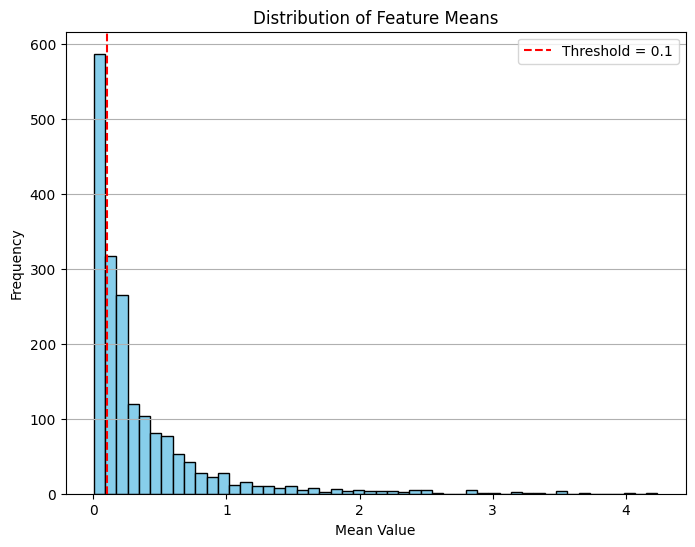

In [10]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################


# Compute the mean for each feature
feature_means = counts.mean(axis=0)

# Set a mean threshold
mean_threshold = 0.1  # Adjust this value as needed

# Filter features with mean below the threshold
selected_features = feature_means[feature_means >= mean_threshold].index
counts_filtered = counts[selected_features]

# Display the results
print(f"Number of features before filtering: {counts.shape[1]}")
print(f"Number of features after filtering: {counts_filtered.shape[1]}")

# Visualize the distribution of mean values
plt.figure(figsize=(8, 6))
plt.hist(feature_means, bins=50, color='skyblue', edgecolor='black')
plt.axvline(mean_threshold, color='red', linestyle='--', label=f"Threshold = {mean_threshold}")
plt.title("Distribution of Feature Means")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y')
plt.show()




### **Exercise 2: Compare Variance Thresholding and Low-Mean Filtering**

In this task, you will compare the features removed by **variance thresholding** and **low-mean filtering**. Specifically, you will:


1. **Apply Variance Thresholding**:
   - Use a variance threshold (e.g., `0.1`) to remove low-variance features.

2. **Apply Low-Mean Filtering**:
   - Use a mean threshold (e.g., `0.1`) to remove low-mean features.

3. **Compare Removed Features**:
   - Identify the sets of features removed by each method.
   - Visualize the overlap using a Venn diagram.

4. **Experiment**:
   - Try different thresholds for variance and mean filtering. How does the overlap change?

5. **Interpretation**
    - Discuss your findings based on the set comparison of the two sets. Would you prefer one method? Is one of the methods better than the other or redundant?   

---
#### How to use the venn diagram method


```python

from matplotlib_venn import venn2

# Define two example sets

set_A = {"gene1", "gene2", "gene3", "gene4"}
set_B = {"gene3", "gene4", "gene5", "gene6"}

# Create a Venn diagram

plt.figure(figsize=(6, 4))
venn = venn2([set_A, set_B], set_labels=("Set A", "Set B"))
plt.title("Example Venn Diagram")
plt.show()

````

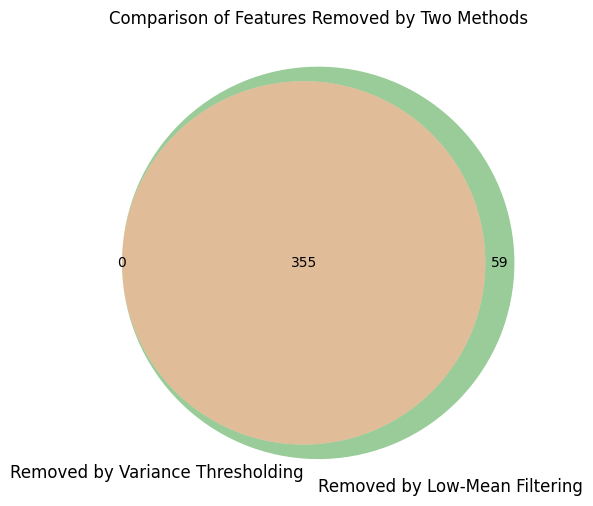

Number of features removed by variance thresholding: 355
Number of features removed by low-mean filtering: 414
Number of features removed by both methods: 355


In [15]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################


from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Apply Variance Thresholding
variance_threshold = 0.15  # Adjust as needed
selector = VarianceThreshold(threshold=variance_threshold)
counts_variance_filtered = selector.fit_transform(counts)
removed_by_variance = set(counts.columns) - set(counts.columns[selector.get_support()])

# Apply Low-Mean Filtering
mean_threshold = 0.05  # Adjust as needed
feature_means = counts.mean(axis=0)
removed_by_mean = set(feature_means[feature_means < mean_threshold].index)

# Compare Removed Features
# Find the intersection and differences
only_variance = removed_by_variance - removed_by_mean
only_mean = removed_by_mean - removed_by_variance
both_methods = removed_by_variance & removed_by_mean

# Visualize with a Venn Diagram
plt.figure(figsize=(8, 6))
venn = venn2(
    [removed_by_variance, removed_by_mean],
    set_labels=("Removed by Variance Thresholding", "Removed by Low-Mean Filtering")
)
plt.title("Comparison of Features Removed by Two Methods")
plt.show()

# Print Summary
print(f"Number of features removed by variance thresholding: {len(removed_by_variance)}")
print(f"Number of features removed by low-mean filtering: {len(removed_by_mean)}")
print(f"Number of features removed by both methods: {len(both_methods)}")

## t-distributed Stochastic Neighborhood Embedding (tSNE)

In [5]:
gene_variances = counts.var(axis=0)

# Define a variance threshold
threshold = .9  # Adjust this value as needed

# Apply variance thresholding
selector = VarianceThreshold(threshold=threshold)
counts_reduced = selector.fit_transform(counts)

# Get the names of the selected genes
selected_genes = counts.columns[selector.get_support()]

# Display the results
print(f"Number of genes before filtering: {counts.shape[1]}")
print(f"Number of genes after filtering: {counts_reduced.shape[1]}")


Number of genes before filtering: 1857
Number of genes after filtering: 665


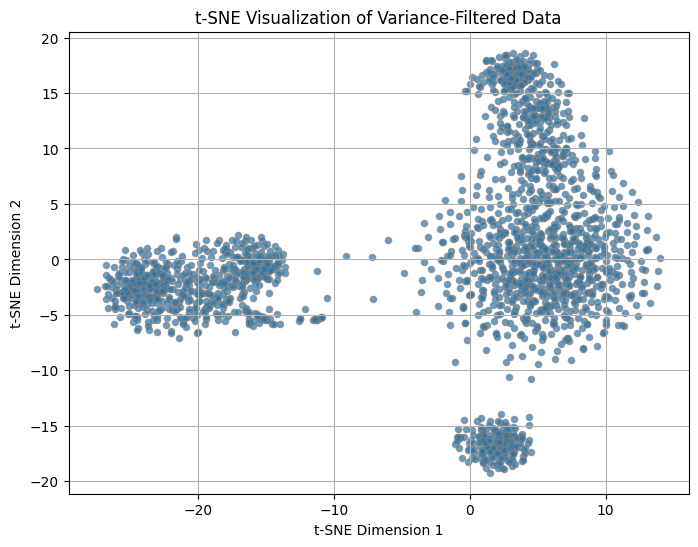

In [6]:
from sklearn.manifold import TSNE

# Step 1: Apply t-SNE
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the variance-filtered data
counts_tsne = tsne.fit_transform(counts_reduced)

# Step 2: Visualize the t-SNE results
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))

plt.scatter(counts_tsne[:, 0], counts_tsne[:, 1], alpha=0.7, edgecolor="gray", s=20)
plt.title("t-SNE Visualization of Variance-Filtered Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid()
plt.show()

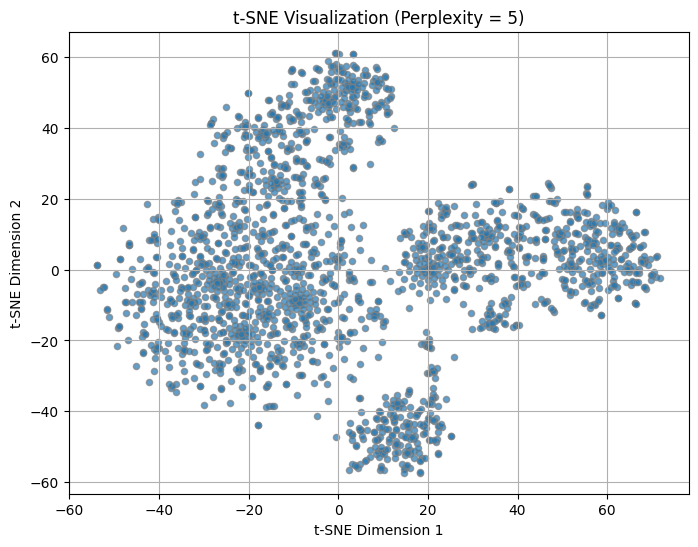

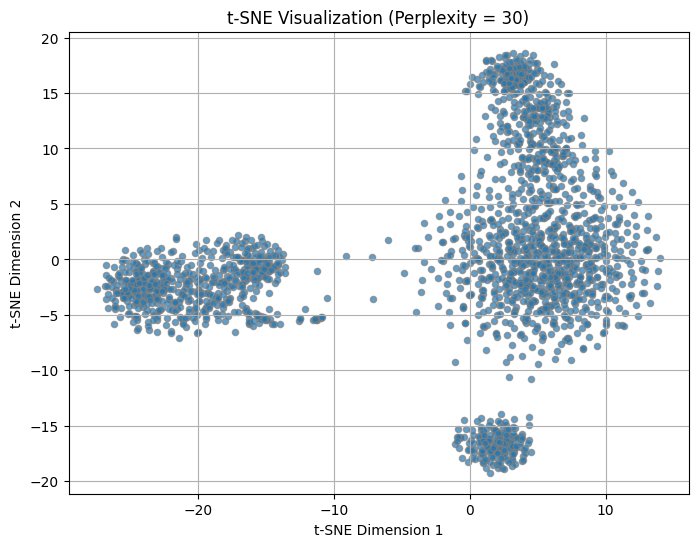

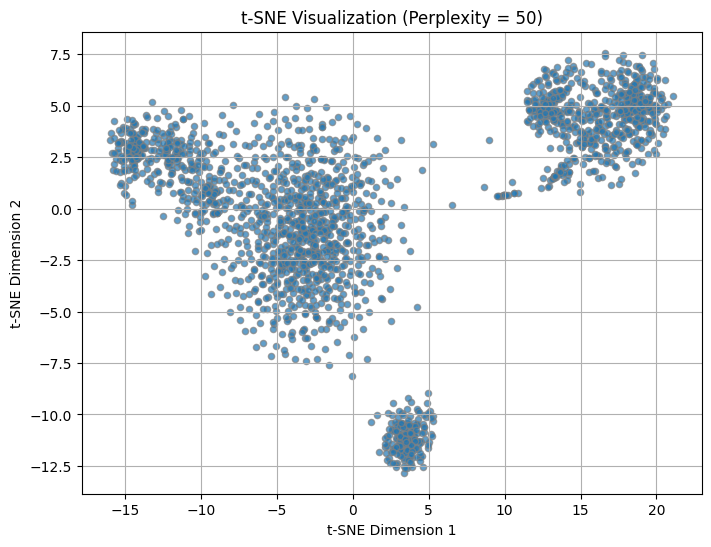

In [25]:
# Example: Experiment with different perplexity values
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    counts_tsne = tsne.fit_transform(counts_reduced)

    plt.figure(figsize=(8, 6))
    plt.scatter(counts_tsne[:, 0], counts_tsne[:, 1], alpha=0.7, edgecolor="gray", s=20)
    plt.title(f"t-SNE Visualization (Perplexity = {perplexity})")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid()
    plt.show()

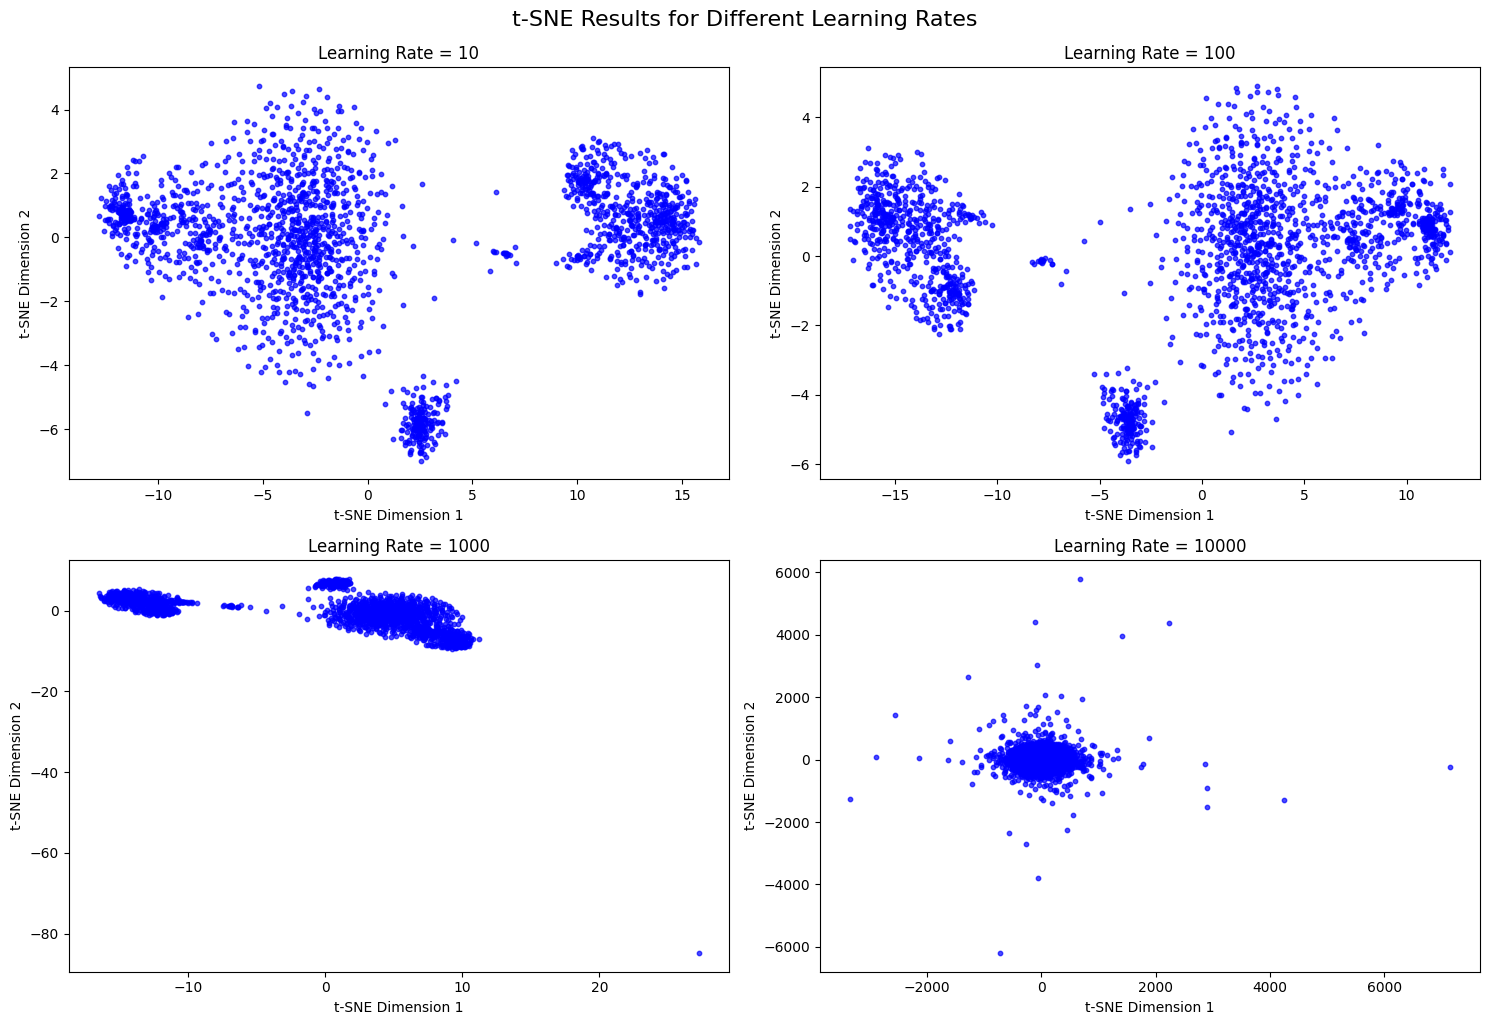

In [9]:

# Define a list of learning rate values to test
learning_rates = [10, 100, 1000, 10000]

# Create a figure to plot the results
plt.figure(figsize=(15, 10))

# Iterate through the learning rate values
for i, lr in enumerate(learning_rates, 1):
    # Apply t-SNE with the current learning rate
    tsne = TSNE(n_components=2, learning_rate=lr, perplexity=100, random_state=42)
    counts_tsne = tsne.fit_transform(counts_reduced)

    # Plot the t-SNE results
    plt.subplot(2, 2, i)  # Create a grid of subplots (2 rows, 3 columns)
    plt.scatter(counts_tsne[:, 0], counts_tsne[:, 1], s=10, alpha=0.7, color='blue')
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.suptitle("t-SNE Results for Different Learning Rates", fontsize=16, y=1.02)
plt.show()

### **Exercise: tSNE the Mammoth**

In this exercise, you will apply **PCA and tSNE** to reduce the three-dimensional Mammoth datset down to two dimensions.

---

### **Steps**

1. **Load, shrink and plot the dataset**:
   - To speed up execution, you will work with a subset of the data.
   - A pre-written cell is provided to handle this for you.

2. **Apply PCA**:
   - Apply Principal Component Analysis as learned in the previous notebook
   - Visualize the reduced data in two dimensions spanned by PCA_1 and PCA_2 axes 

3. **Apply tSNE**:
   - Apply t-distributed stochastic neighborhood embedding as learned above in this notebook
   - Visualize the reduced data in two dimensions spanned by tSNE_1 and tSNE_2 axes 
   - Try out different values for perplexity and learning rate 
   - (Optional) If you feel the mammoth is separeted well into pieces apply a clustering algorithm

---


### Mammoth data set

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset and skip the header row

path = 'data/'
data = pd.read_csv(path + 'mammoth.csv', header=0, low_memory=False)

# Convert columns to numeric, ignoring non-numeric rows
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (e.g., the header row or invalid data)
data = data.dropna()

# Select a subset of the data (e.g., first 100,000 rows)
# subset = data.iloc[:100000]

# Randomly sample 10% of the data
subset = data.sample(frac=0.03, random_state=42)  # Adjust frac for a different percentage


### make a static figure with Axes3D

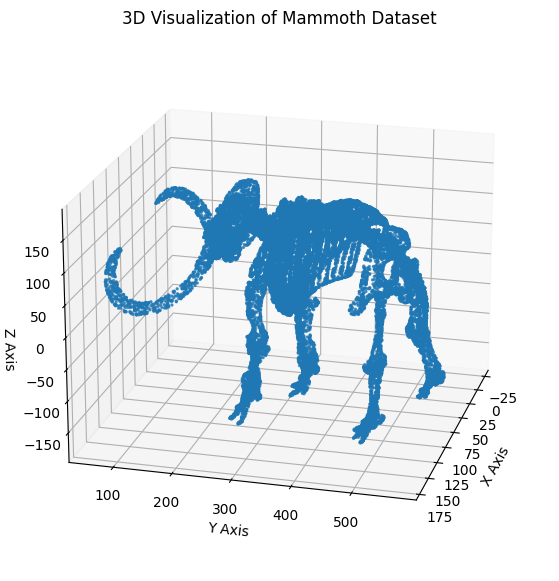

In [30]:

from mpl_toolkits.mplot3d import Axes3D


# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(
    subset.iloc[:, 0],  # First column for x-coordinates
    subset.iloc[:, 1],  # Second column for y-coordinates
    subset.iloc[:, 2],  # Third column for z-coordinates
    s=2,                # Marker size
    alpha=0.7           # Marker transparency
)

# Customize the layout
ax.set_title("3D Visualization of Mammoth Dataset")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

ax.view_init(elev=20, azim=15)  # Adjust elevation and azimuth angles

# Show the plot
plt.show()

### ... or an interactive html with plotly

In [ ]:
# Create a 3D scatter plot using graph_objects
fig = go.Figure(data=[go.Scatter3d(
    x=subset.iloc[:, 0],  # First column for x-coordinates
    y=subset.iloc[:, 1],  # Second column for y-coordinates
    z=subset.iloc[:, 2],  # Third column for z-coordinates
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.7
    )
)])

# Customize the layout
fig.update_layout(
    title="3D Visualization of Mammoth Dataset",
    scene=dict(
        xaxis_title="X Axis",
        yaxis_title="Y Axis",
        zaxis_title="Z Axis"
    )
)

# Save the plot as an HTML file
fig.write_html(path + 'mammoth_3d.html')

### Apply PCA and tSNE here

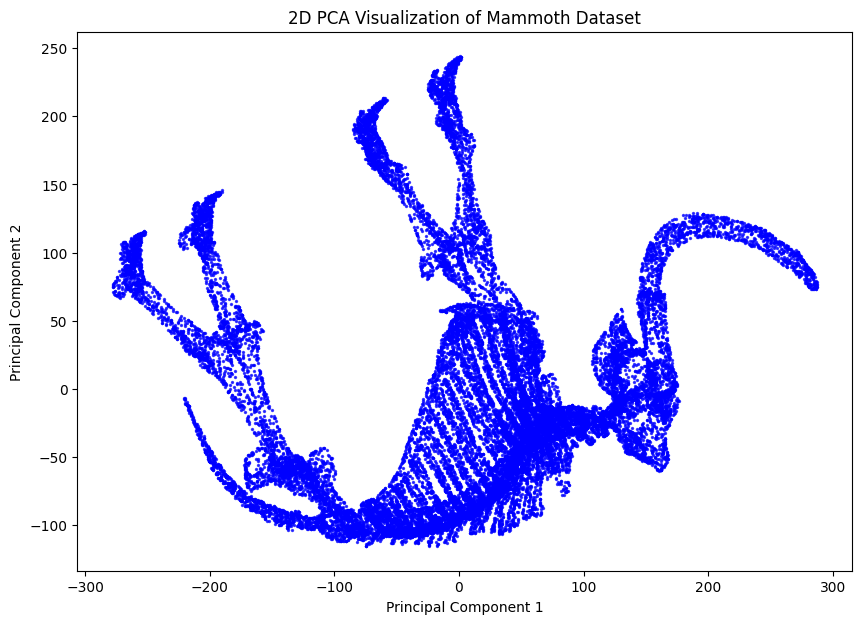

In [ ]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
reduced_data_pca = pca.fit_transform(subset)

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(
    reduced_data_pca[:, 0],  # First principal component
    reduced_data_pca[:, 1],  # Second principal component
    s=2,                 # Marker size
    alpha=0.7,           # Marker transparency
    color='blue'
)

# Customize the layout
plt.title("2D PCA Visualization of Mammoth Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show the plot
plt.show()

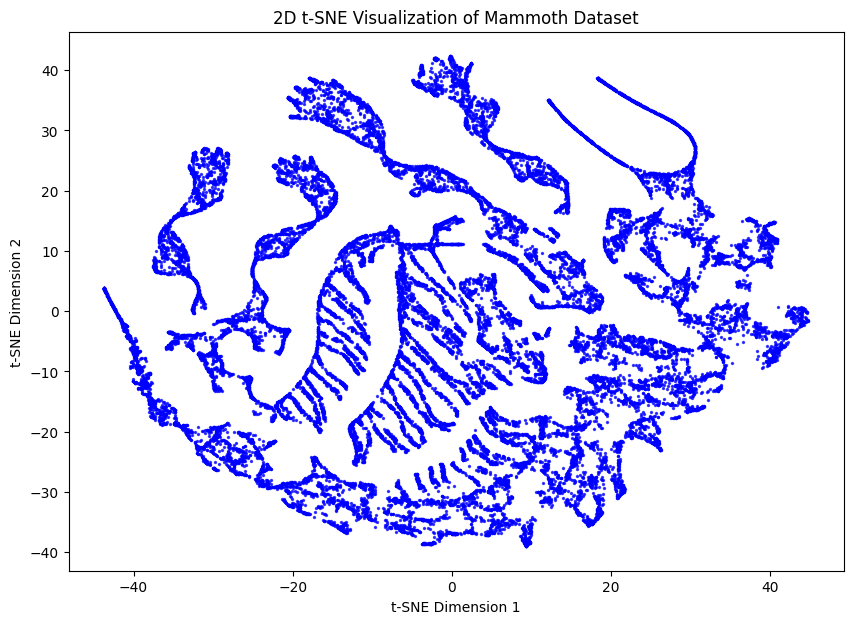

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=100, learning_rate=50, n_iter=1000, random_state=42)
reduced_data = tsne.fit_transform(subset)

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(
    reduced_data[:, 0],  # First t-SNE dimension
    reduced_data[:, 1],  # Second t-SNE dimension
    s=2,                 # Marker size
    alpha=0.7,           # Marker transparency
    color='blue'
)

# Customize the layout
plt.title("2D t-SNE Visualization of Mammoth Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



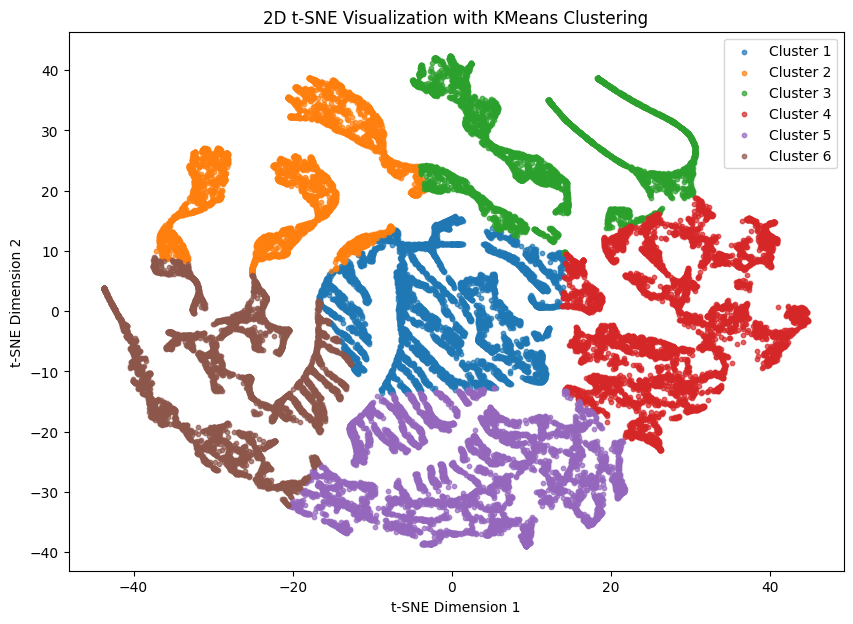

In [ ]:
# K-MEANS CLUSTERING

from sklearn.cluster import KMeans
import numpy as np

# Apply KMeans clustering on the reduced data
n_clusters = 6  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_data)

# Create a scatter plot with cluster coloring
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    # Plot each cluster with a different color
    plt.scatter(
        reduced_data[cluster_labels == cluster, 0],  # t-SNE Dimension 1
        reduced_data[cluster_labels == cluster, 1],  # t-SNE Dimension 2
        s=10,                                        # Marker size
        alpha=0.7,                                   # Marker transparency
        label=f"Cluster {cluster + 1}"              # Cluster label
    )



# Customize the layout
plt.title("2D t-SNE Visualization with KMeans Clustering")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Score: 0.0672137662768364


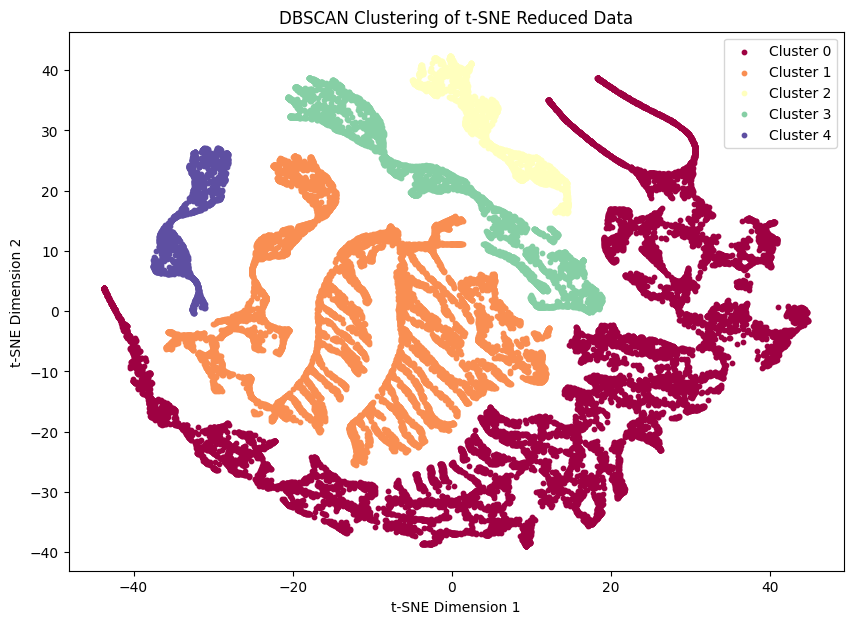

In [ ]:
# DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Apply DBSCAN
eps = 2  # Maximum distance between two samples to be considered neighbors
min_samples = 10  # Minimum number of points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(reduced_data)

# Number of clusters (excluding noise points, which are labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score (only if there are more than 1 cluster)
if n_clusters > 1:
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be calculated with less than 2 clusters.")

# Plot the DBSCAN Clustering Results
plt.figure(figsize=(10, 7))
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)

    # Plot the points that belong to the cluster
    xy = reduced_data[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering of t-SNE Reduced Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

# UMAP

In this step, we load the gene expression dataset from above. The dataset is normalized and ready for dimensionality reduction. 

We use UMAP (Uniform Manifold Approximation and Projection) to reduce the high-dimensional data to 2 dimensions for visualization and further analysis. UMAP is particularly effective for preserving both local and global structures in high-dimensional datasets like this one.

In [44]:
##### LOAD cell-gene dataset ####
# from google.colab import drive
# from google.colab import files
import pandas as pd
import numpy as np

# For google Colabs do
# drive.mount('/content/drive')

path = 'data/'
counts = pd.read_csv(path + 'adata_lognormed_final.csv', index_col=0)

print(type(counts))
print(counts.head())

print('Rows (cells): %d, Columns (genes): %d' % counts.shape)
###############################

<class 'pandas.core.frame.DataFrame'>
                  TNFRSF4  CPSF3L  ATAD3C  C1orf86      RER1  TNFRSF25  \
AAACATACAACCAC-1      0.0     0.0     0.0      0.0  0.000000  4.552789   
AAACATTGAGCTAC-1      0.0     0.0     0.0      0.0  3.038826  0.000000   
AAACATTGATCAGC-1      0.0     0.0     0.0      0.0  3.545876  0.000000   
AAACCGTGCTTCCG-1      0.0     0.0     0.0      0.0  3.277530  0.000000   
AAACGCACTGGTAC-1      0.0     0.0     0.0      0.0  0.000000  0.000000   

                  TNFRSF9  CTNNBIP1  SRM  UBIAD1  ...     BRWD1  BACE2  SIK1  \
AAACATACAACCAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACATTGAGCTAC-1      0.0       0.0  0.0     0.0  ...  3.038826    0.0   0.0   
AAACATTGATCAGC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACCGTGCTTCCG-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   
AAACGCACTGGTAC-1      0.0       0.0  0.0     0.0  ...  0.000000    0.0   0.0   

                  C21orf33  ICOSLG  

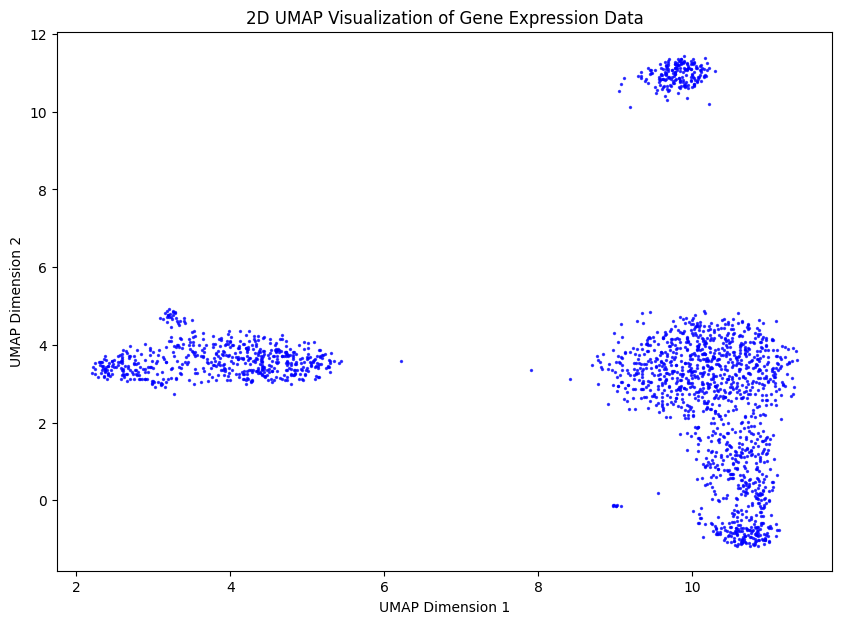

In [64]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP to reduce to 2 dimensions
reducer = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
umap_embedding = reducer.fit_transform(counts)

# Visualize the UMAP embedding
plt.figure(figsize=(10, 7))
plt.scatter(
    umap_embedding[:, 0],  # UMAP Dimension 1
    umap_embedding[:, 1],  # UMAP Dimension 2
    s=2,                   # Marker size
    alpha=0.7,             # Transparency
    color='blue'           # Marker color
)
plt.title("2D UMAP Visualization of Gene Expression Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

### Evaluating Trustworthiness of the UMAP Embedding

Here, we calculate the **trustworthiness** of the UMAP embedding, which measures how well the local structure of the high-dimensional data is preserved in the low-dimensional space. A higher trustworthiness score (closer to 1) indicates better preservation of local neighborhoods.

In [65]:
from sklearn.manifold import trustworthiness

# Calculate trustworthiness of the UMAP embedding
trust = trustworthiness(counts, umap_embedding, n_neighbors=15)
print(f"Trustworthiness of the UMAP embedding: {trust:.4f}")

Trustworthiness of the UMAP embedding: 0.7963


### Exercise: Comparing Metrics for UMAP Embedding

**Objective**: Explore how different distance metrics affect the quality of the UMAP embedding by calculating and comparing the **trustworthiness** scores.

---

#### Steps to Complete:
1. **Test Different Metrics**:
   - Use the following 5 distance metrics: `'euclidean'`, `'cosine'`, `'manhattan'`, `'correlation'`, and `'chebyshev'`.
   - For each metric, apply UMAP to the dataset to reduce it to 2 dimensions.

2. **Calculate Trustworthiness**:
   - For each UMAP embedding, calculate the **trustworthiness**.

3. **Visualize the Results**:
   - Create a **barplot** to compare the trustworthiness scores for the 5 metrics.
   - Label the x-axis with the metric names and the y-axis with the trustworthiness scores.

4. **Investigate KNN Preservation**:
   - If the trustworthiness scores are too similar to be informative, make yourself familiar with the k-nearest neighbor (KNN) preservation score instead.
   - Compare the overlap of k-nearest neighbors between the high-dimensional and low-dimensional spaces for each metric.
   - Create a new barplot to visualize the KNN preservation scores.



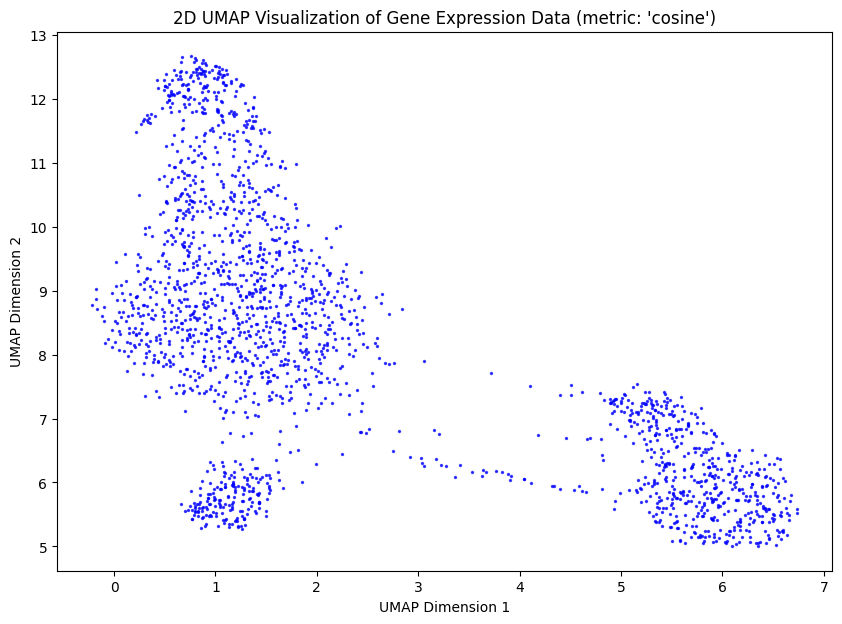

In [ ]:
##############################
#
#  S O L U T I O N
#
#
##############################
##############################

# Apply UMAP to reduce to 2 dimensions
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
umap_embedding = reducer.fit_transform(counts)

# Visualize the UMAP embedding
plt.figure(figsize=(10, 7))
plt.scatter(
    umap_embedding[:, 0],  # UMAP Dimension 1
    umap_embedding[:, 1],  # UMAP Dimension 2
    s=2,                   # Marker size
    alpha=0.7,             # Transparency
    color='blue'           # Marker color
)
plt.title("2D UMAP Visualization of Gene Expression Data (metric: 'cosine')")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

Metric: euclidean, Trustworthiness: 0.7963
Metric: cosine, Trustworthiness: 0.7862
Metric: manhattan, Trustworthiness: 0.7938
Metric: correlation, Trustworthiness: 0.7992
Metric: chebyshev, Trustworthiness: 0.7443


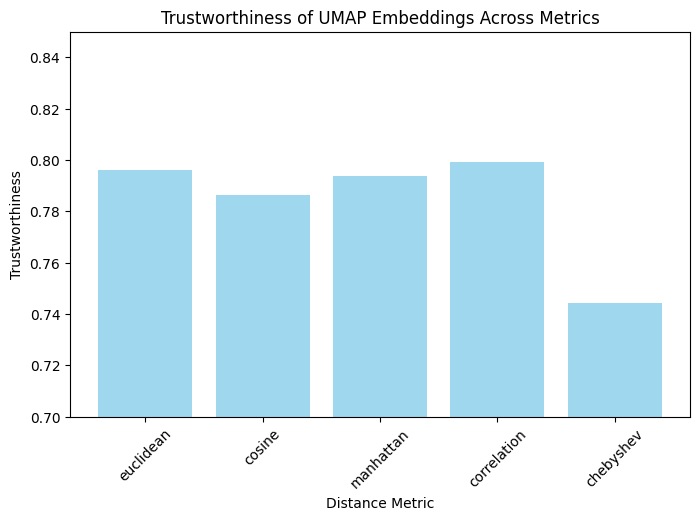

In [ ]:


import umap
from sklearn.manifold import trustworthiness
import matplotlib.pyplot as plt

# List of metrics to test
metrics = ['euclidean', 'cosine', 'manhattan', 'correlation', 'chebyshev']

# Store results
trustworthiness_scores = []

# Loop through each metric
for metric in metrics:
    # Apply UMAP with the current metric
    reducer = umap.UMAP(n_components=2, metric=metric, random_state=42)
    umap_embedding = reducer.fit_transform(counts)
    
    # Calculate trustworthiness
    trust = trustworthiness(counts, umap_embedding, n_neighbors=15)
    trustworthiness_scores.append(trust)
    print(f"Metric: {metric}, Trustworthiness: {trust:.4f}")

# Plot the trustworthiness scores
plt.figure(figsize=(8, 5))
plt.bar(metrics, trustworthiness_scores, color='skyblue', alpha=0.8)
plt.title("Trustworthiness of UMAP Embeddings Across Metrics")
plt.xlabel("Distance Metric")
plt.ylabel("Trustworthiness")
plt.ylim(0.7, .85)  # Trustworthiness ranges from 0 to 1 but better zoom in here
plt.xticks(rotation=45)
plt.show()

Metric: euclidean, KNN Preservation: 0.0876
Metric: cosine, KNN Preservation: 0.0718
Metric: manhattan, KNN Preservation: 0.0773
Metric: correlation, KNN Preservation: 0.0812
Metric: chebyshev, KNN Preservation: 0.0382


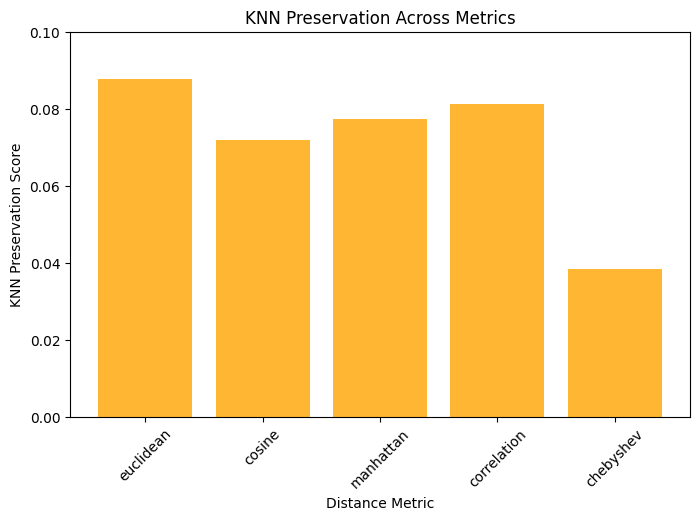

In [76]:
import umap
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# List of metrics to test
metrics = ['euclidean', 'cosine', 'manhattan', 'correlation', 'chebyshev']

# Store KNN preservation results
knn_preservation_scores = []

# Function to calculate KNN preservation
def calculate_knn_preservation(high_dim_data, low_dim_data, n_neighbors=15):
    # Find k-nearest neighbors in high-dimensional space
    high_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(high_dim_data)
    high_dim_neighbors = high_dim_nn.kneighbors(return_distance=False)
    
    # Find k-nearest neighbors in low-dimensional space
    low_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(low_dim_data)
    low_dim_neighbors = low_dim_nn.kneighbors(return_distance=False)
    
    # Calculate KNN preservation
    knn_preservation = 0
    for i in range(high_dim_data.shape[0]):
        shared_neighbors = np.intersect1d(high_dim_neighbors[i], low_dim_neighbors[i])
        knn_preservation += len(shared_neighbors)
    knn_preservation = knn_preservation / (n_neighbors * high_dim_data.shape[0])
    return knn_preservation

# Loop through each metric
for metric in metrics:
    # Apply UMAP with the current metric
    reducer = umap.UMAP(n_components=2, metric=metric, random_state=42)
    umap_embedding = reducer.fit_transform(counts)
    
    # Calculate KNN preservation
    knn_preservation = calculate_knn_preservation(counts, umap_embedding, n_neighbors=15)
    knn_preservation_scores.append(knn_preservation)
    
    print(f"Metric: {metric}, KNN Preservation: {knn_preservation:.4f}")

# Plot the KNN preservation results
x = np.arange(len(metrics))  # X-axis positions
plt.figure(figsize=(8, 5))
plt.bar(x, knn_preservation_scores, color='orange', alpha=0.8)
plt.xticks(x, metrics, rotation=45)
plt.title("KNN Preservation Across Metrics")
plt.xlabel("Distance Metric")
plt.ylabel("KNN Preservation Score")
plt.ylim(0, .1)  
plt.show()